# Run All

## Import and Load

Import library yang dibutuhkan

In [ ]:
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import itertools

Mengubah Style

In [ ]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])

Load Dataset

In [ ]:
df_hebuban = pd.read_excel('https://drive.google.com/uc?id=1l3tRHD0umuyyHLJxMBVZY_szLNRKgAa1')

Lihat Dataset

In [ ]:
df_hebuban.head()

,author_username,referenced_author_username,author_id,referenced_author_id,tweet_id,referenced_tweet_id,text,created_at,relation,lang,source
0,yasuthi13,Tidak ada referenced tweet,716452119931330560,Tidak ada referenced tweet,1511905311535247361,Tidak ada referenced tweet,ヘブバンの2章普通に泣けるんだが…\n#ヘブバン,2022-04-07 03:14:50+00:00,Tidak ada relasi,ja,Twitter for iPhone
1,KOKUHAKU_210,sHjSu1LfvuPseH0,1476093504011276289,1503233976655237121,1511905300995264517,1511886232745558018,RT @sHjSu1LfvuPseH0: #hvbnFA\n#ヘブバン\n#大島四ツ葉\n\...,2022-04-07 03:14:48+00:00,retweeted,ja,Twitter for iPhone
2,hakuoden,Tidak ada referenced tweet,1089445166128062464,Tidak ada referenced tweet,1511905296406704131,Tidak ada referenced tweet,( ⌒ ͜ ⌒ )＜おでん今日の #ヘブバン\n\n緊急参戦！\nLDブログのゲームNO.1...,2022-04-07 03:14:47+00:00,Tidak ada relasi,ja,Twitter for Android
3,West99974912,824_aoi,1342479462776983552,3111958734,1511905133478572037,1511696175866707972,RT @824_aoi: 次回の #ゆめきぼ 学園は…！🕊\n\n🏫4月13日21:00〜🏫...,2022-04-07 03:14:08+00:00,retweeted,ja,Twitter for iPhone
4,West99974912,yumekibogakuen,1342479462776983552,1255058861112692736,1511905123781382145,1511636485249765387,RT @yumekibogakuen: #古賀葵 の羽ばたけ！！ #ゆめきぼ 学園\nお友達...,2022-04-07 03:14:06+00:00,retweeted,ja,Twitter for iPhone


Ukuran Dataset

In [ ]:
df_hebuban.shape

(14852, 11)

Info Dataset

In [ ]:
df_hebuban.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14852 entries, 0 to 14851
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   author_username             14852 non-null  object
 1   referenced_author_username  14852 non-null  object
 2   author_id                   14852 non-null  int64 
 3   referenced_author_id        14852 non-null  object
 4   tweet_id                    14852 non-null  int64 
 5   referenced_tweet_id         14852 non-null  object
 6   text                        14852 non-null  object
 7   created_at                  14852 non-null  object
 8   relation                    14852 non-null  object
 9   lang                        14852 non-null  object
 10  source                      14852 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.2+ MB


## Praproses

### Melakukan Drop pada Tweet yang tidak berelasi

Mencari yang tidak memiliki relasi

In [ ]:
df_hebuban['author_username'][df_hebuban["referenced_author_username"] == "Tidak ada referenced tweet"].count()

6513

Ditampung ke index_drop

In [ ]:
index_drop = df_hebuban[df_hebuban["referenced_author_username"] == "Tidak ada referenced tweet"].index
len(index_drop)

6513

Melakukan drop dan melihat sisa data

In [ ]:
df_hebuban = df_hebuban.drop(index_drop)
df_hebuban.shape

(8339, 11)

### Cek Relasi ke Diri Sendiri

Mencari yang berelasi ke diri sendiri

In [ ]:
df_hebuban['author_username'][df_hebuban["referenced_author_username"] == df_hebuban["author_username"]].count()

299

Menampung index yang akan didrop

In [ ]:
index_drop = df_hebuban['author_username'][df_hebuban["referenced_author_username"] == df_hebuban["author_username"]].index
len(index_drop)

299

Hasil akhir setelah drop

In [ ]:
df_hebuban = df_hebuban.drop(index_drop)
df_hebuban.shape

(8040, 11)

### Reset Index

Melakukan reset index karena sebelumnya ada index yang didrop

In [ ]:
df_hebuban = df_hebuban.reset_index(drop=True)
df_hebuban.head()

,author_username,referenced_author_username,author_id,referenced_author_id,tweet_id,referenced_tweet_id,text,created_at,relation,lang,source
0,KOKUHAKU_210,sHjSu1LfvuPseH0,1476093504011276289,1503233976655237121,1511905300995264517,1511886232745558018,RT @sHjSu1LfvuPseH0: #hvbnFA\n#ヘブバン\n#大島四ツ葉\n\...,2022-04-07 03:14:48+00:00,retweeted,ja,Twitter for iPhone
1,West99974912,824_aoi,1342479462776983552,3111958734,1511905133478572037,1511696175866707972,RT @824_aoi: 次回の #ゆめきぼ 学園は…！🕊\n\n🏫4月13日21:00〜🏫...,2022-04-07 03:14:08+00:00,retweeted,ja,Twitter for iPhone
2,West99974912,yumekibogakuen,1342479462776983552,1255058861112692736,1511905123781382145,1511636485249765387,RT @yumekibogakuen: #古賀葵 の羽ばたけ！！ #ゆめきぼ 学園\nお友達...,2022-04-07 03:14:06+00:00,retweeted,ja,Twitter for iPhone
3,sanagi_hvbn,sHjSu1LfvuPseH0,1497853701717135361,1503233976655237121,1511904694456963073,1511886232745558018,RT @sHjSu1LfvuPseH0: #hvbnFA\n#ヘブバン\n#大島四ツ葉\n\...,2022-04-07 03:12:23+00:00,retweeted,ja,Twitter for iPhone
4,isshi_nekoha,092596Tk,1465274875841769475,2373534090,1511904344882352138,1510215147054280705,RT @092596Tk: くるくるパーカー( ˘ω˘ )\n#ヘブバン\n#hvbnFA...,2022-04-07 03:11:00+00:00,retweeted,ja,Twitter for Android


## Model Graf

Membuat Graf

In [ ]:
h_graph = nx.Graph()

for i in range(len(df_hebuban)):
  h_graph.add_edge(df_hebuban['author_username'][i], df_hebuban['referenced_author_username'][i])

Visualisasi Graf. Waktu Run sekitar 1.5 menit

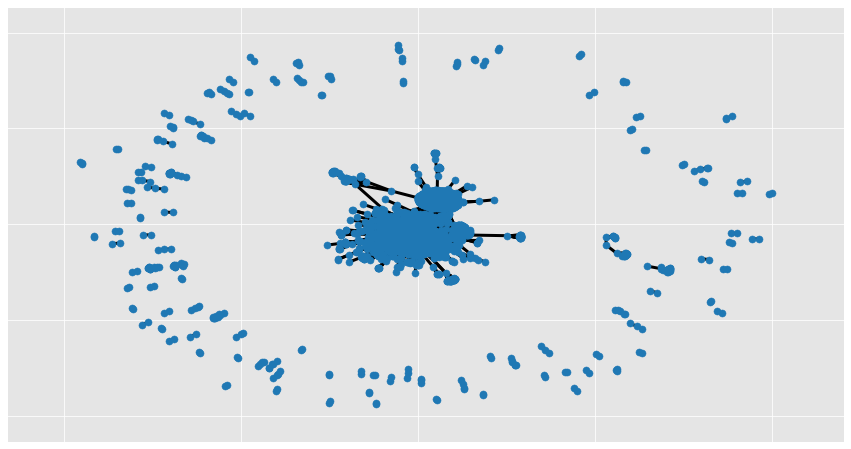

In [ ]:
nx.draw_networkx(h_graph, node_size=50, width=3, with_labels=False)
plt.show()

## Perhitungan Centrality

Menggunakan eigenvector_centrality()

In [ ]:
nilai_centrality = nx.eigenvector_centrality(h_graph, max_iter=200)
nilai_centrality = dict(sorted(nilai_centrality.items(), key=lambda item: item[1],reverse=True))
# print(nilai_centrality)

Hasil menjadi Dataframe

In [ ]:
list_influence = list(nilai_centrality.keys())
list_nilai = list(nilai_centrality.values())

df_influence = pd.DataFrame({'Username' : list_influence, 'Nilai Eigenvector' : list_nilai})
df_influence.head(11)

,Username,Nilai Eigenvector
0,heavenburnsred,0.699312
1,Yuugen_99,0.040409
2,ndjiru_n,0.040397
3,092596Tk,0.038065
4,Tatika081,0.029662
5,KegurunekuR33,0.028999
6,game_tori10,0.028088
7,ogayan0301,0.026894
8,kegani_0207,0.026858
9,DIVAvivylove1,0.026283


## Statistik

In [ ]:
print("Banyaknya Nodes = ", h_graph.number_of_nodes())
print("Banyaknya Edges = ", h_graph.number_of_edges())

Banyaknya Nodes =  4367
Banyaknya Edges =  7112
